In [2]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

import yfinance as yf
pltr = yf.Ticker("pltr")
pltr = pltr.history(period="max")
##pltr.index

rolling_averages = pltr.rolling(5).mean()

print(rolling_averages.shift(-1))
  
pltr["DIF_5"] = pltr["Close"] - rolling_averages["Close"]
    
sig = pltr.iloc[-300:]['DIF_5'].values
sig.size


                                Open    High     Low   Close       Volume  \
Date                                                                        
2020-09-30 00:00:00-04:00        NaN     NaN     NaN     NaN          NaN   
2020-10-01 00:00:00-04:00        NaN     NaN     NaN     NaN          NaN   
2020-10-02 00:00:00-04:00        NaN     NaN     NaN     NaN          NaN   
2020-10-05 00:00:00-04:00   9.444000  10.092   9.020   9.418  129016240.0   
2020-10-06 00:00:00-04:00   9.452000   9.908   9.196   9.518   72233840.0   
...                              ...     ...     ...     ...          ...   
2023-12-21 00:00:00-05:00  17.858000  18.025  17.509  17.608   45298780.0   
2023-12-22 00:00:00-05:00  17.704000  17.859  17.421  17.576   39611300.0   
2023-12-26 00:00:00-05:00  17.664001  17.803  17.343  17.480   37488920.0   
2023-12-27 00:00:00-05:00  17.582000  17.787  17.389  17.542   33537780.0   
2023-12-28 00:00:00-05:00        NaN     NaN     NaN     NaN          NaN   

300

In [2]:
   
sig_fft = fftpack.fft(sig)
sample_freq = fftpack.fftfreq(sig.size, d= 1 )
Amplitude = np.abs(sig_fft)
Power = Amplitude*2
Angle = np.angle(sig_fft)
print(sig_fft)



[ 22.847999  -0.00000000e+00j -10.2455752 +7.14037250e+00j
  15.27190451+1.88359984e-01j  -2.40117586+2.57073993e+01j
   0.17562101-9.48526367e+00j  -5.19531422+2.04995463e+00j
   0.55548066-2.36390604e+00j  -0.04191813+2.29116329e+01j
 -18.32767616-1.83270905e+01j   4.36174426+6.17835974e+00j
 -20.32820064+2.60412253e+00j -16.12942686-1.20662400e+01j
  -4.7710559 -1.94444136e+01j  20.58175035-1.61300836e+01j
  19.31899133-4.02299099e+00j   3.36027382+1.08553374e+01j
  10.19455604-5.09798229e+00j  14.56924347+1.50390871e+01j
  -5.55495462+6.61458271e+00j  -7.46842758-1.50001167e+01j
   5.67683435-7.58482378e+00j -12.06265883+9.04995617e+00j
 -10.57657045-1.33384540e+01j  -9.18448178-1.12798617e+01j
   5.08580828+3.31069025e+00j   4.22931209+7.08119579e+00j
  -4.79875088-1.38671926e+01j  25.72155745+1.69985375e+01j
  -2.25718502+9.23679115e+00j -12.02877845-3.09859317e+01j
  11.28964358+7.54092133e+00j  -2.09639129+1.82160627e+01j
 -25.7539876 +4.87682623e+00j  -7.38795146+1.63991593e+0

{29: (-12.028778452971213-30.985931712932043j), 27: (25.721557453491044+16.998537480771624j), 32: (-25.753987599735805+4.876826227006298j), 13: (20.581750346575873-16.13008358891208j), 37: (20.827389757006397-12.135487525252502j), 36: (-18.717328151298684-13.680434127125135j)}


Text(0, 0.5, 'Amplitude')

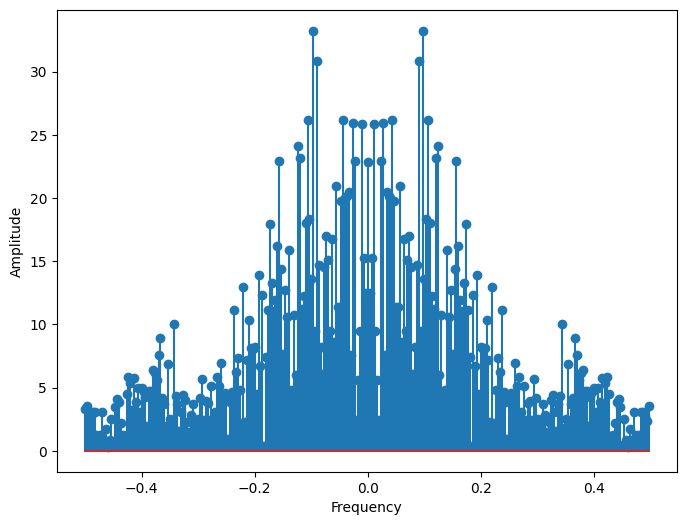

In [3]:
# Amp_Freq = np.array([Amplitude,sample_freq,Angle])
# Amp_position = Amp_Freq[0,:].argmax()
# peak_freq = Amp_Freq[1,Amp_position]
# print(f'Amp_position index is {Amp_position}')
# print(f'Amp_position max is: {Amplitude[Amp_position]}')
# print(f'Amp_position second max is: {Amplitude[29]}')
from collections import OrderedDict
fft_dict = {i:k for i, k in enumerate(sig_fft)}
fft_dict_sorted = OrderedDict(sorted(fft_dict.items(), key=lambda e:np.abs(e[1]),reverse=True))
peak_sig = {}
for key, value in fft_dict_sorted.items():
 if key >10 and key < 100:
  peak_sig[key] = value
  if len(peak_sig) == 6:
   break

print(peak_sig)
# peak_freq_angle = Amp_Freq[2,Amp_position]
# print(peak_freq_angle)
plt.figure(figsize= (8,6))
plt.stem(sample_freq,Amplitude)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

In [4]:
m = np.array(
      [[11, 12, 13, 14],
       [21, 22, 23, 24],
       [31, 32, 33, 34],
       [41, 42, 43, 44],
       [51, 52, 53, 54],
       [61, 62, 63, 64], 
       [71, 72, 73, 74],
       [81, 82, 83, 84],
       [91, 92, 93, 94]])
m[0,:].argmax()
      

3

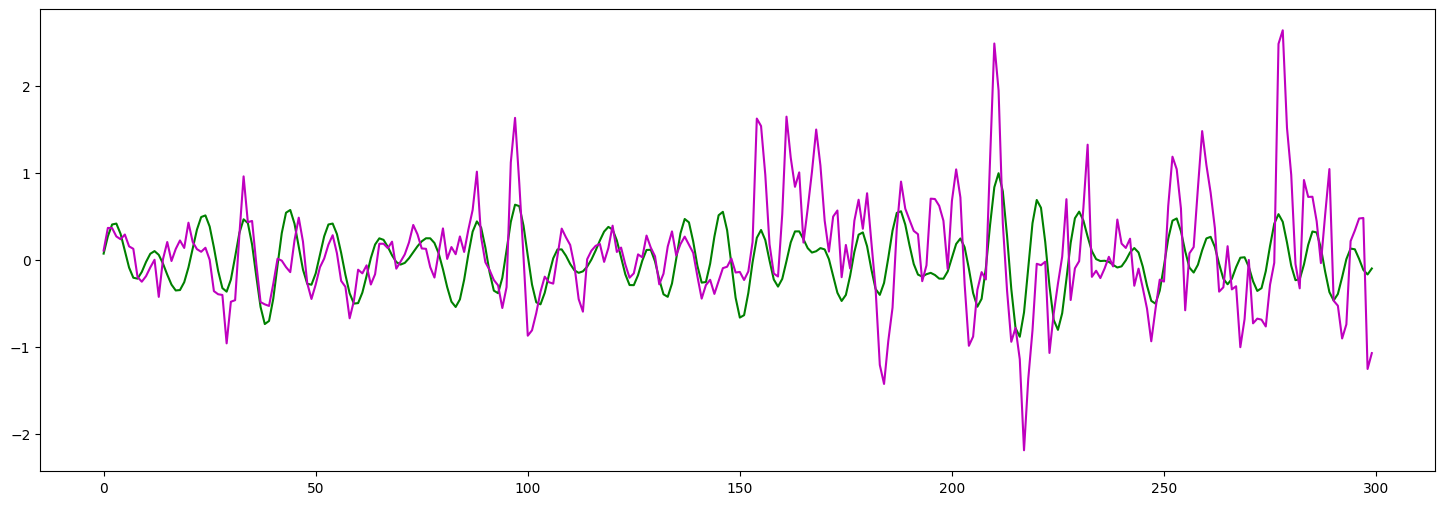

In [5]:
##28.310317990229706-16.614629075772775j
x = np.arange(0,300,1)
plt.figure(figsize= (18,6))

final_sig = 0
for f , v in peak_sig.items():
 final_sig += 1/150*(v.real*np.cos(f*2*np.pi*(x/300))-v.imag*np.sin(f*2*np.pi*(x/300)))

plt.plot(x,final_sig,color='green')
##plt.show()
plt.plot(x,sig,color='m')
plt.show()